<a href="https://colab.research.google.com/github/PriyanshuBBSR/Book_Price_Prediction/blob/main/Predict_price_of_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
#supressing Warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis, zscore

In [2]:
train=pd.read_excel('Data_Train.xlsx')
train.name="Train Dataset"
test=pd.read_excel('Data_Test.xlsx')
test.name="Test Dataset"
price=pd.read_excel('Sample_Submission.xlsx')

## Data understanding

In [3]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
train.shape

(6237, 9)

In [6]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [8]:
test.shape

(1560, 8)

Train Dataset:


*  we have 9 cols and 6237 entries.
*  price is our target variable

Test Dataset:


*  we have 9 cols and 1560 entries.

Data Cleaning:





Missing Values:

In [9]:
def missing_values(df):
    M = round((df.isnull().sum()/len(df)),2)*100
    print("Missing values in ",df.name)
    print(M[M>0])

In [10]:
missing_values(train)
missing_values(test)

Missing values in  Train Dataset
Series([], dtype: float64)
Missing values in  Test Dataset
Series([], dtype: float64)


- no missing values.

Reviews: Extracting review

In [11]:
train['Reviews']=train['Reviews'].apply(lambda x:float(x.split()[0]))
test['Reviews']=test['Reviews'].apply(lambda x:float(x.split()[0]))

'Ratings': Extracting the No. of Ratings

In [12]:
train.Ratings.value_counts()

1 customer review       1040
2 customer reviews       708
3 customer reviews       491
4 customer reviews       355
5 customer reviews       300
                        ... 
207 customer reviews       1
764 customer reviews       1
279 customer reviews       1
255 customer reviews       1
483 customer reviews       1
Name: Ratings, Length: 342, dtype: int64

In [13]:
 train.Ratings=train.Ratings.apply(lambda x:(x.split()[0].replace(',',''))).astype(int)
 test.Ratings=test.Ratings.apply(lambda x:(x.split()[0].replace(',',''))).astype(int)
 # here astype() is a diff method to converting values type inti int type . the float one was another type of method.

Standardisation:

In [14]:
def to_lower(df,cols):
  for col in cols:
    df[col]=df[col].str.lower()

In [15]:
cols=['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory']

In [16]:
#train dataset
to_lower(train, cols)
#test_dataset
to_lower(test, cols)

Genre:

In [17]:
train.Genre=train.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))
test.Genre=test.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))

Feature Engineering:

'Extracting' year of publish from the Edition column

In [18]:
train['Edition_Year']=train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test['Edition_Year']=test['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')

In [19]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,2016
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,2012
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,humour,299.00,1982
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",180.00,2017
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0,1,"for seven decades, ""life"" has been thrilling t...",photography,"arts, film & photography",965.62,2006


Data Analysis

In [20]:
# Function for barplot Analysis
def Analysis (df, cols, hue= None):
  plt.figure(figsize=(25,10))
  fig=1
  i=(len(cols)//5)+1
  for col in cols:
    plt.subplot(i, 5, fig)
    title=str(col)+ "Analysis"
    plot=sns.barplot(data=df,x=col, y='Price', palette='coolwarm', ci=None, order=sorted(df[col].unique()), hue=hue)
    plot.set_title(title)
    fig=fig+1

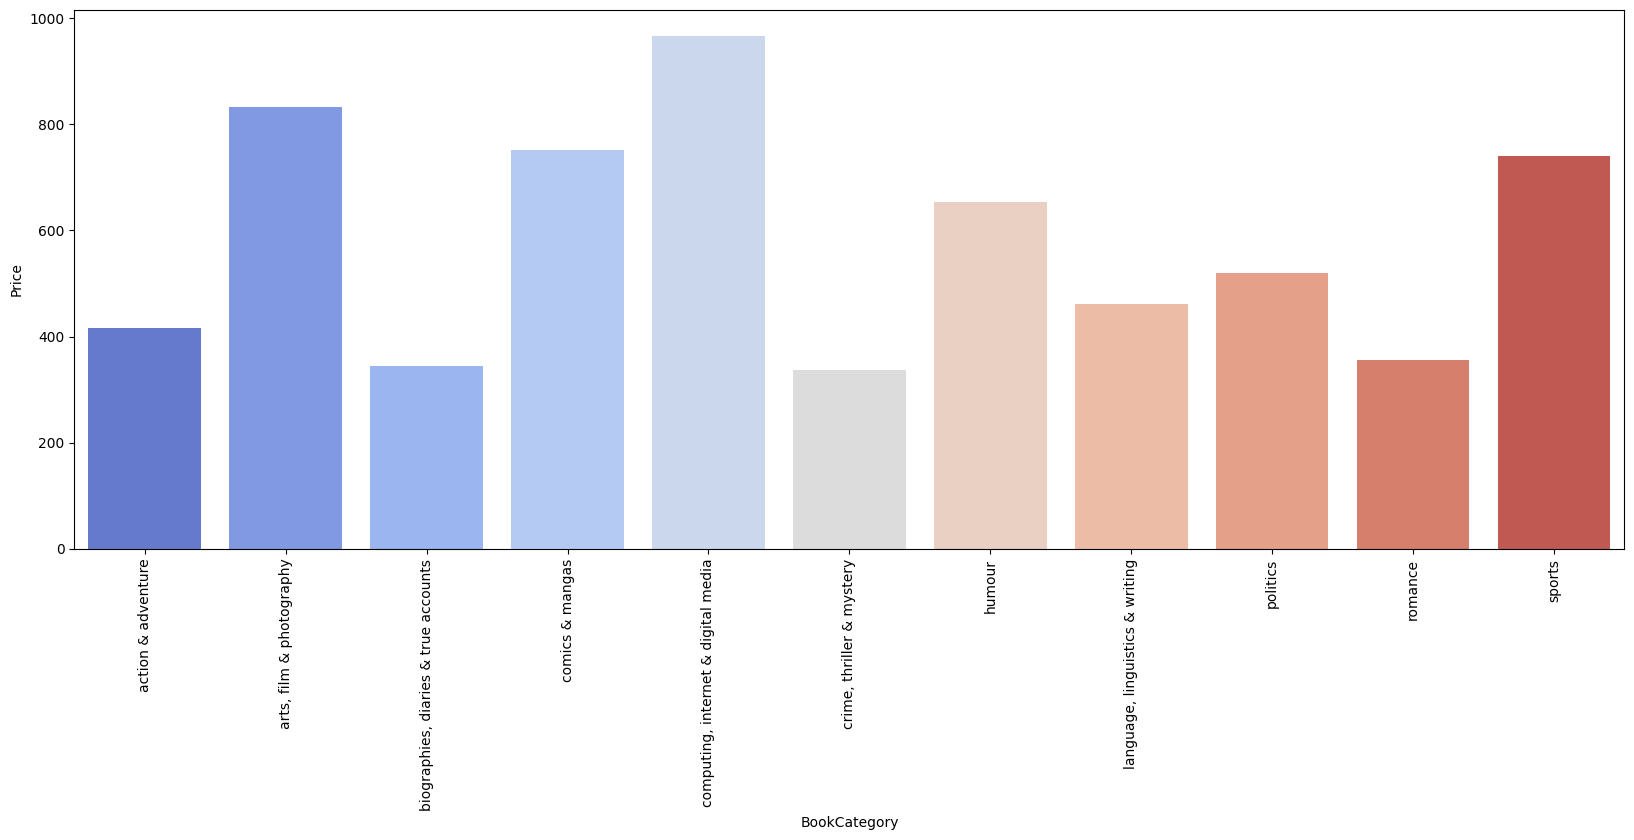

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(data=train, x='BookCategory', y='Price', palette='coolwarm', ci=None, order=sorted(train['BookCategory'].unique()), hue= None)
plt.xticks(rotation=90)
plt.show()

From the above bar plot we can see, Computing, Internet & digital media category has higher price value.

In [22]:
#Function to check the distribution across the numeric data in the dataset
def distribution_check(df, cols):
  plt.figure(figsize=(25,7))
  fig=1
  i=(len(cols)//3)+1
  for col in cols:
    sk="skewness: "+str(skew(df[col])) +"\nkurtosis: "+ str(kurtosis(df[col]))
    plt.subplot(i,3,fig)
    sns.distplot(df[col]).set_title(sk)
    fig=fig+1

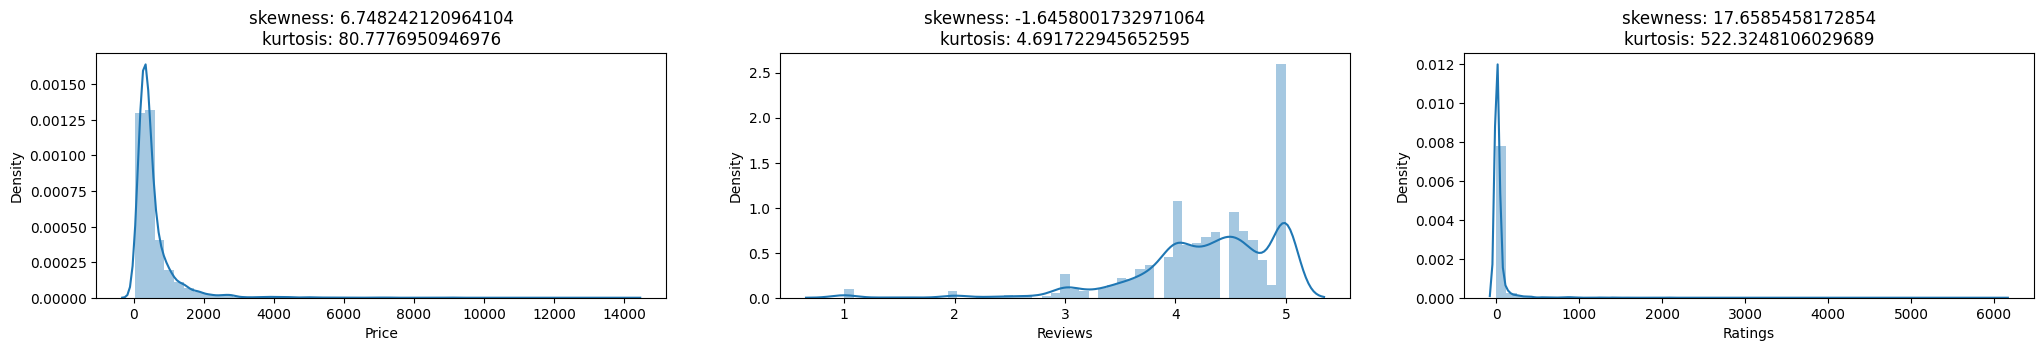

In [23]:
distribution_check(train, ['Price', 'Reviews', 'Ratings'])

from the plot, we can observe the datas are not normally distributed, the dist plot for price column as we can see is left skewed and it is same for ratings column with witch much higher skewness. The Reviews plot is however more rightly skewed.

Data Preparation

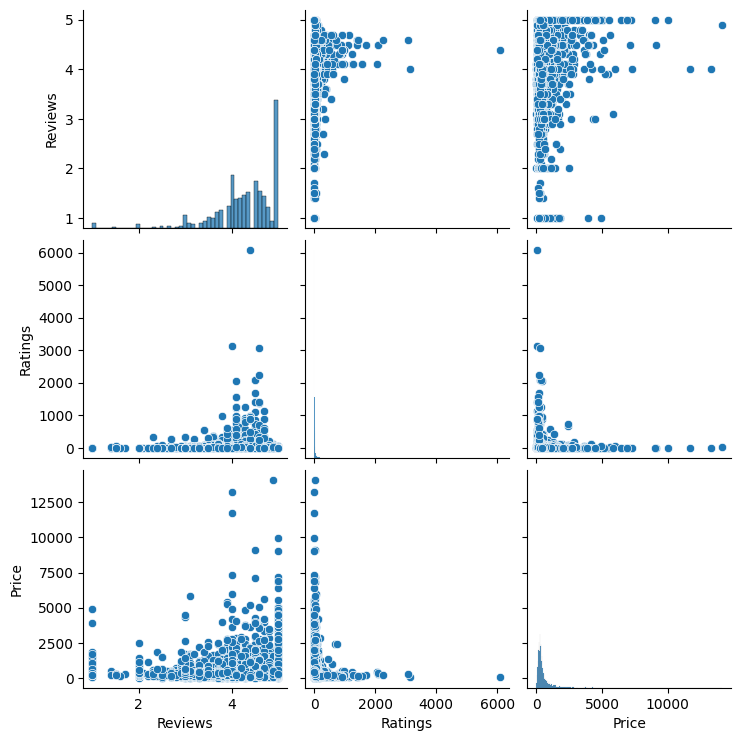

In [24]:
sns.pairplot(train)
plt.show()

From the above plot, we can observe that:
1. For ratings vs reviews: more points lie on the buttom right corner i.e. for higher review the rating is still not that high and falls on lower range.

2. For Price vs Reviews: points are not that much to one corner but somehow falls on same price range category.

3. For Ratings vs Price: most of the points falls on the bottom left corner i.e. for lesser price books the ratings are also low how ever some books at price also have lesser ratings and some books at lower price also have higher ratings.

how ever there is not such correlation between the points. We can observe it through a heatmap.

<Axes: >

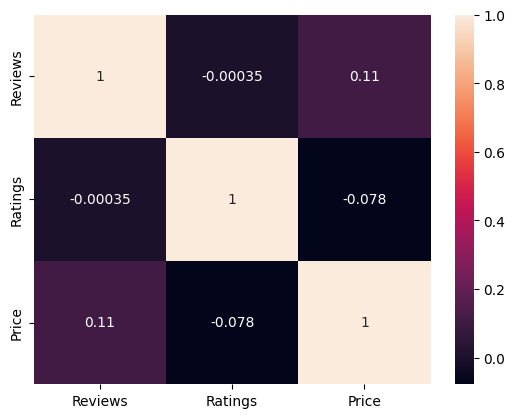

In [25]:
sns.heatmap(train.corr(), annot=True)


From the corelation heatmap we can see there is no such high corelation between the columns.

Distribution of columns of test dataset

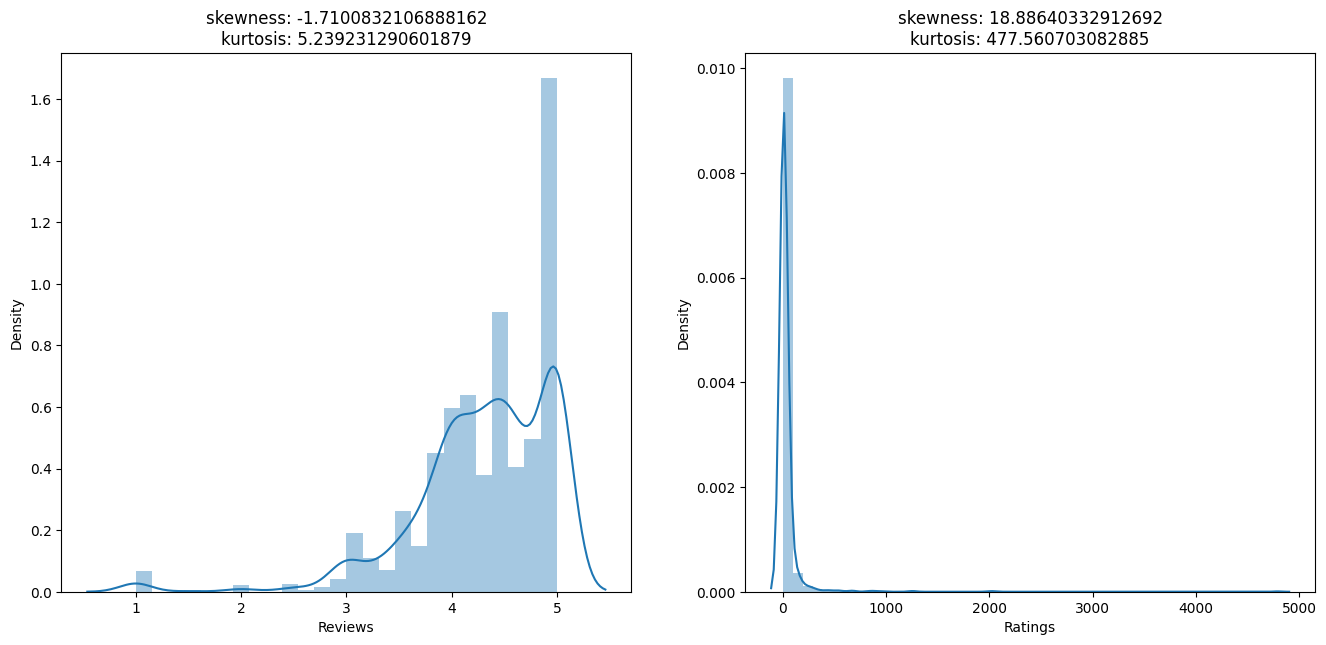

In [26]:
distribution_check(test,['Reviews','Ratings'])

Applying Power Transformation

In [27]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer()

In [28]:
train[['Reviews']]=power.fit_transform(train[['Reviews']])
test[['Reviews']] = power.transform(test[['Reviews']])

In [29]:
train[['Ratings']]=power.fit_transform(train[['Ratings']])
test[['Ratings']] = power.transform(test[['Ratings']])

In [30]:
train[['Price']]=power.fit_transform(train[['Price']])
price[['Price']] = power.transform(price[['Price']])

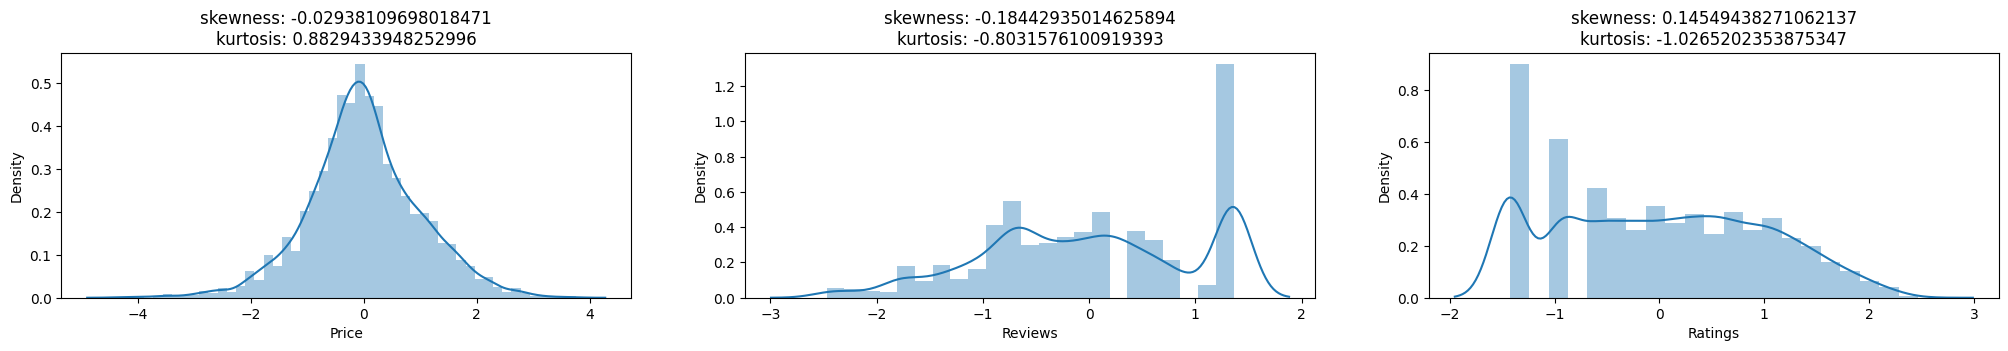

In [31]:
distribution_check(train,['Price','Reviews','Ratings'])

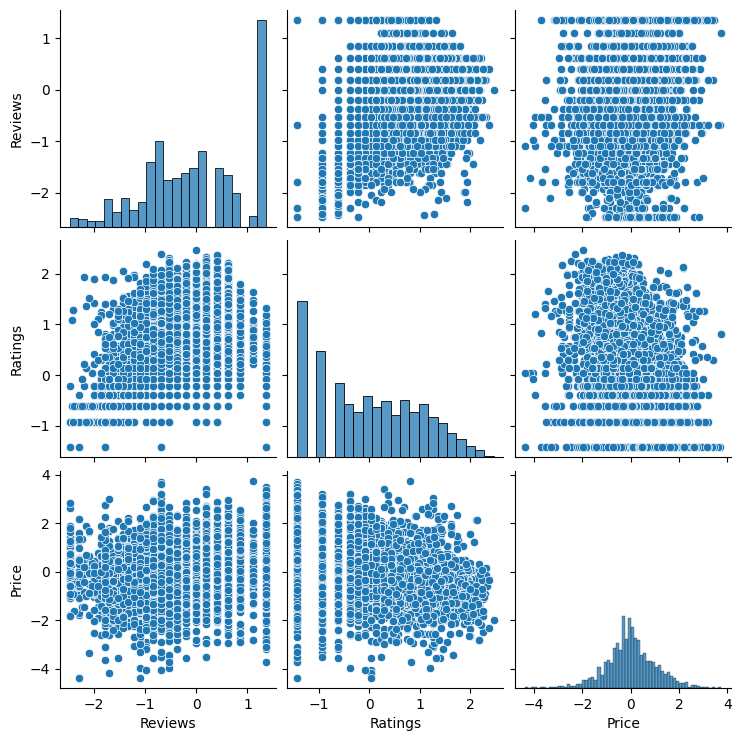

In [32]:
sns.pairplot(train)
plt.show()

After applying the transformation, the columns are more normally distributed having less skewness.


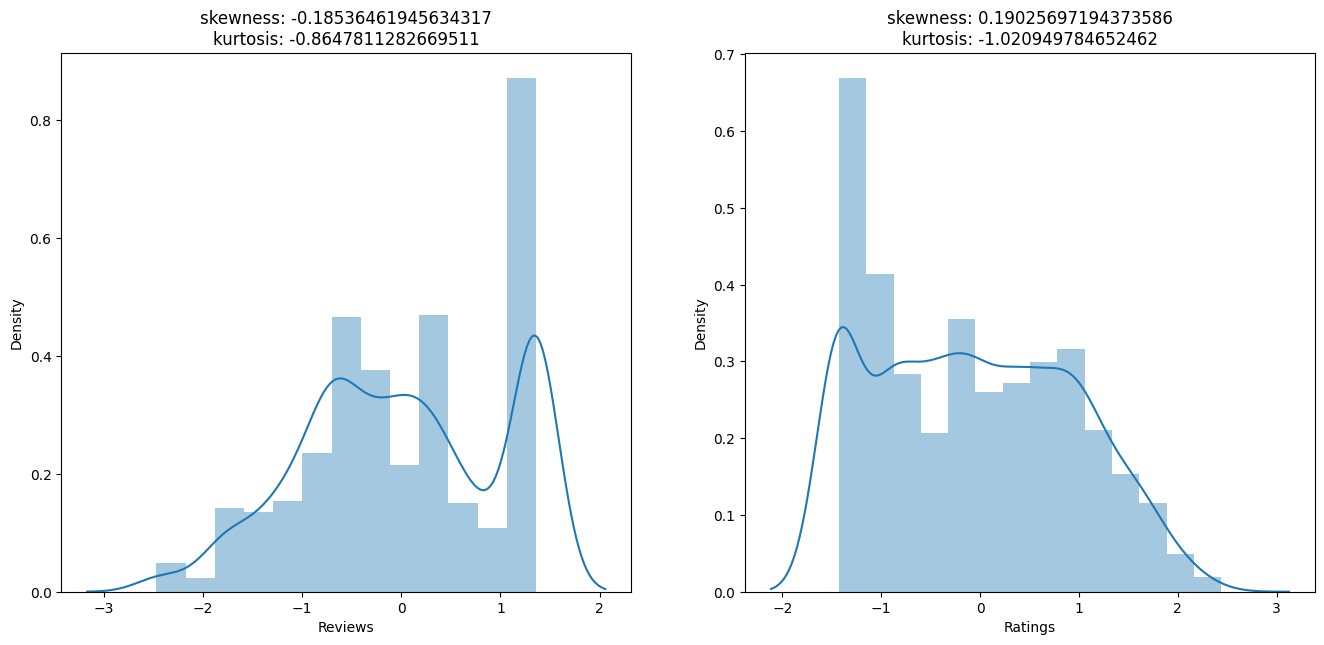

In [33]:
distribution_check(test,['Reviews','Ratings'])

In [34]:
train.drop(columns=['Edition','Synopsis','Title'],inplace=True)


In [35]:
test.drop(columns=['Edition','Synopsis','Title'],inplace=True)


In [36]:
train.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,chris kuzneski,-0.688861,0.138231,action & adventure,action & adventure,-0.769233,2016
1,arun khopkar,-0.834876,0.526742,cinema & broadcast,"biographies, diaries & true accounts",-0.885866,2012
2,thomas hobbes,0.853798,-0.076231,international relation,humour,-0.337797,1982
3,agatha christie,-0.533420,0.477727,contemporary fiction,"crime, thriller & mystery",-1.061408,2017
4,editors of life,1.359627,-1.427835,photography,"arts, film & photography",1.150774,2006


In [37]:
len(train.Author.unique())

3670

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   Genre         6237 non-null   object 
 4   BookCategory  6237 non-null   object 
 5   Price         6237 non-null   float64
 6   Edition_Year  6237 non-null   object 
dtypes: float64(3), object(4)
memory usage: 341.2+ KB


changing the dtype of categorical values to category

In [39]:
train=train.astype({'Author':'category', 'Genre':'category', 'BookCategory': 'category', 'Edition_Year': 'category'})


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Edition_Year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 354.2 KB


In [41]:
test = test.astype({'Author':'category','Genre':'category','BookCategory':'category','Edition_Year':'category'})


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   Genre         6237 non-null   category
 4   BookCategory  6237 non-null   category
 5   Price         6237 non-null   float64 
 6   Edition_Year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 354.2 KB


In [43]:
y=train.pop('Price')

In [44]:
df=pd.concat(objs=[train,test], axis=0)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        7797 non-null   object  
 1   Reviews       7797 non-null   float64 
 2   Ratings       7797 non-null   float64 
 3   Genre         7797 non-null   object  
 4   BookCategory  7797 non-null   category
 5   Edition_Year  7797 non-null   object  
dtypes: category(1), float64(2), object(3)
memory usage: 373.5+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
cols_toEncode=['Author', 'Genre', 'BookCategory', 'Edition_Year']

In [49]:
df['Author']=le.fit_transform(df['Author'])

In [50]:
df['Genre']=le.fit_transform(df['Genre'])

In [51]:
df['BookCategory']=le.fit_transform(df['BookCategory'])

In [52]:
df['Edition_Year']=le.fit_transform(df['Edition_Year'])

In [53]:
train_size=len(train)

In [54]:
train=df[:train_size]
test=df[train_size:]

In [55]:
train=train.astype({'Author':'int', 'Genre':'int', 'BookCategory':'int', 'Edition_Year': 'int'})

In [56]:
test=test.astype({'Author':'int', 'Genre':'int', 'BookCategory':'int', 'Edition_Year': 'int'})

We have combined the test, train for Label Encoder, inorder to have all the possible values

In [57]:
train['Price']=y

splitting the train data to x_train&y_train

In [58]:
y_train=train.pop('Price')
X_train=train

Model Building LightGBM

LightGBM is a gradiant boosting framework that uses tree based learning algorithms.It is designed to be distributed and efficient with the following advantaged:

- Faster training speed and higher
  efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

In [59]:
import lightgbm as lgb

In [60]:
#convert the dataset to LgbDataset
df_train=lgb.Dataset(X_train, y_train)

LightGBM can use categorical features directly (without one-hot encoding). hows about 8x speed-up compared with one-hot encoding.

- We specify either index, label of the categorical columns as below

In [61]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1', 'auc'],
    'learning_rate': 1,
    'categorical_feature':[0,3,4,5],
    'num_iterations':10000
}

In [62]:
rg=lgb.LGBMRegressor(**hyper_params)

LightGBM uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins. This speeds up training and reduces memory usage

- it grows trees by leaf-wise. It will choose the leaf with max delta loss to grow

In [63]:
rg.fit(X_train,y_train)

LGBMRegressor(categorical_feature=[0, 3, 4, 5], learning_rate=1,
              metric=['l1', 'auc'], num_iterations=10000,
              objective='regression', task='train')

In [64]:
y_pred_train = rg.predict(X_train)

In [65]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [66]:
y_pred_train

array([-0.76923322, -0.88586557, -0.33779669, ...,  0.05151626,
       -0.24906556, -0.38730439])

In [67]:
print("Train MSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))

Train MSE: 0.17225311354181036


In [68]:
print("Train r2_score:",r2_score(y_train, y_pred_train))

Train r2_score: 0.9703288648751522


Text Predictions

In [69]:
y_test_pred = rg.predict(test)

In [70]:
y_test_pred = pd.DataFrame(y_test_pred,columns=['Price'])

In [71]:
predictions = power.inverse_transform(y_test_pred[['Price']])

In [72]:
#pd.DataFrame(predictions,columns=['Price']).to_csv('my_submission_1.csv',index=None)